In [74]:
import pandas as pd
import numpy as np
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [75]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
data = pd.read_csv('/content/spam.csv')

In [77]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [78]:
data['Message'] = data['Message'].apply(lambda x:x.replace('\r\n',' '))

In [79]:
data.Message.iloc[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [80]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [81]:
data.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [83]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [84]:
data.shape

(5572, 2)

In [85]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [86]:
data['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

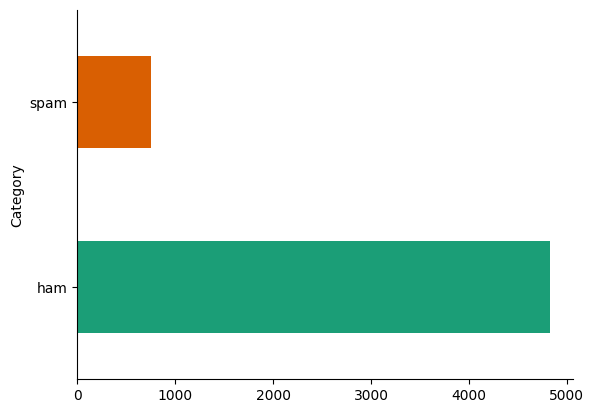

In [87]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [88]:
stemmer = PorterStemmer()
corpus = []

In [89]:
stopwords_set = set(stopwords.words('english'))

for i in range(len(data)):
  text = data['Message'].iloc[i].lower()
  text = text.translate(str.maketrans('', '', string.punctuation)).split()
  text = [stemmer.stem(word) for word in text if word not in stopwords_set]
  text = ' '.join(text)
  corpus.append(text)

In [90]:
# Before changing the stopwords and stemmer
data.Message.iloc[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [91]:
# After changing the stopwords and stemmer
corpus[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [92]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus).toarray()
y = data.Category

In [93]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [94]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

In [95]:
# Training and testing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [96]:
# Implementing the model
model = RandomForestClassifier(n_jobs=-1)

model.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [97]:
model.score(X_test,y_test)

0.97847533632287

In [98]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [99]:
model1.score(X_test,y_test)

0.9829596412556054

In [100]:
email_to_classify = data.Message.values[5568]

In [101]:
email_to_classify

'Will ü b going to esplanade fr home?'

In [102]:
print("-----------------------------------------------------------")
email_text = email_to_classify.lower()
print(email_text)
print("-----------------------------------------------------------")

email_text = email_text.translate(str.maketrans('','',string.punctuation)).split()
print(email_text)
print("-----------------------------------------------------------")

email_text = [stemmer.stem(word) for word in email_text if word not in stopwords_set]
print(email_text)
print("-----------------------------------------------------------")

email_text = ''.join(email_text)
print(email_text)

email_corpus = [email_text]
print("-----------------------------------------------------------")
print(email_corpus)

-----------------------------------------------------------
will ü b going to esplanade fr home?
-----------------------------------------------------------
['will', 'ü', 'b', 'going', 'to', 'esplanade', 'fr', 'home']
-----------------------------------------------------------
['ü', 'b', 'go', 'esplanad', 'fr', 'home']
-----------------------------------------------------------
übgoesplanadfrhome
-----------------------------------------------------------
['übgoesplanadfrhome']


In [103]:
X_email = vectorizer.transform(email_corpus)

In [104]:
model.predict(X_email)

array(['ham'], dtype=object)

In [105]:
model1.predict(X_email)

array(['ham'], dtype=object)